In [5]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

[[[423.5 299.5  22.2]
  [144.5 179.5  20. ]
  [119.5 283.5  24.4]
  [136.5 510.5  21. ]
  [519.5 181.5  24.4]
  [320.5 512.5  24.4]
  [511.5 350.5  22.2]
  [513.5 459.5  22.2]
  [411.5 687.5  20. ]
  [230.5 568.5  24.4]
  [418.5 574.5  24.4]
  [333.5 290.5  23.3]
  [169.5 235.5  24.4]
  [505.5 574.5  24.4]
  [419.5 353.5  22.2]
  [323.5 461.5  21. ]
  [228.5 455.5  22.2]
  [332.5 179.5  21.1]
  [420.5 459.5  24.4]
  [232.5 406.5  24.4]
  [139.5 456.5  22.1]
  [127.5 675.5  24.4]
  [227.5 514.5  24.4]
  [420.5 406.5  24.4]
  [505.5 626.5  24.4]
  [514.5 243.5  24.4]
  [424.5 182.5  20. ]
  [388.5 403.5  24.4]
  [227.5 623.5  20. ]
  [311.5 566.5  24.4]
  [135.5 563.5  22.2]
  [161.5 396.5  24.4]
  [229.5 679.5  24.4]
  [431.5 512.5  24.4]
  [236.5 185.5  22.2]
  [509.5 516.5  22.2]
  [413.5 635.5  21.1]
  [513.5 406.5  21.1]
  [506.5 687.5  22.1]
  [244.5 295.5  24.4]
  [394.5 291.5  24.4]
  [276.5 635.5  24.4]
  [315.5 408.5  24.4]
  [321.5 629.5  24.4]
  [335.5 352.5  24.4]
  [334.5 2

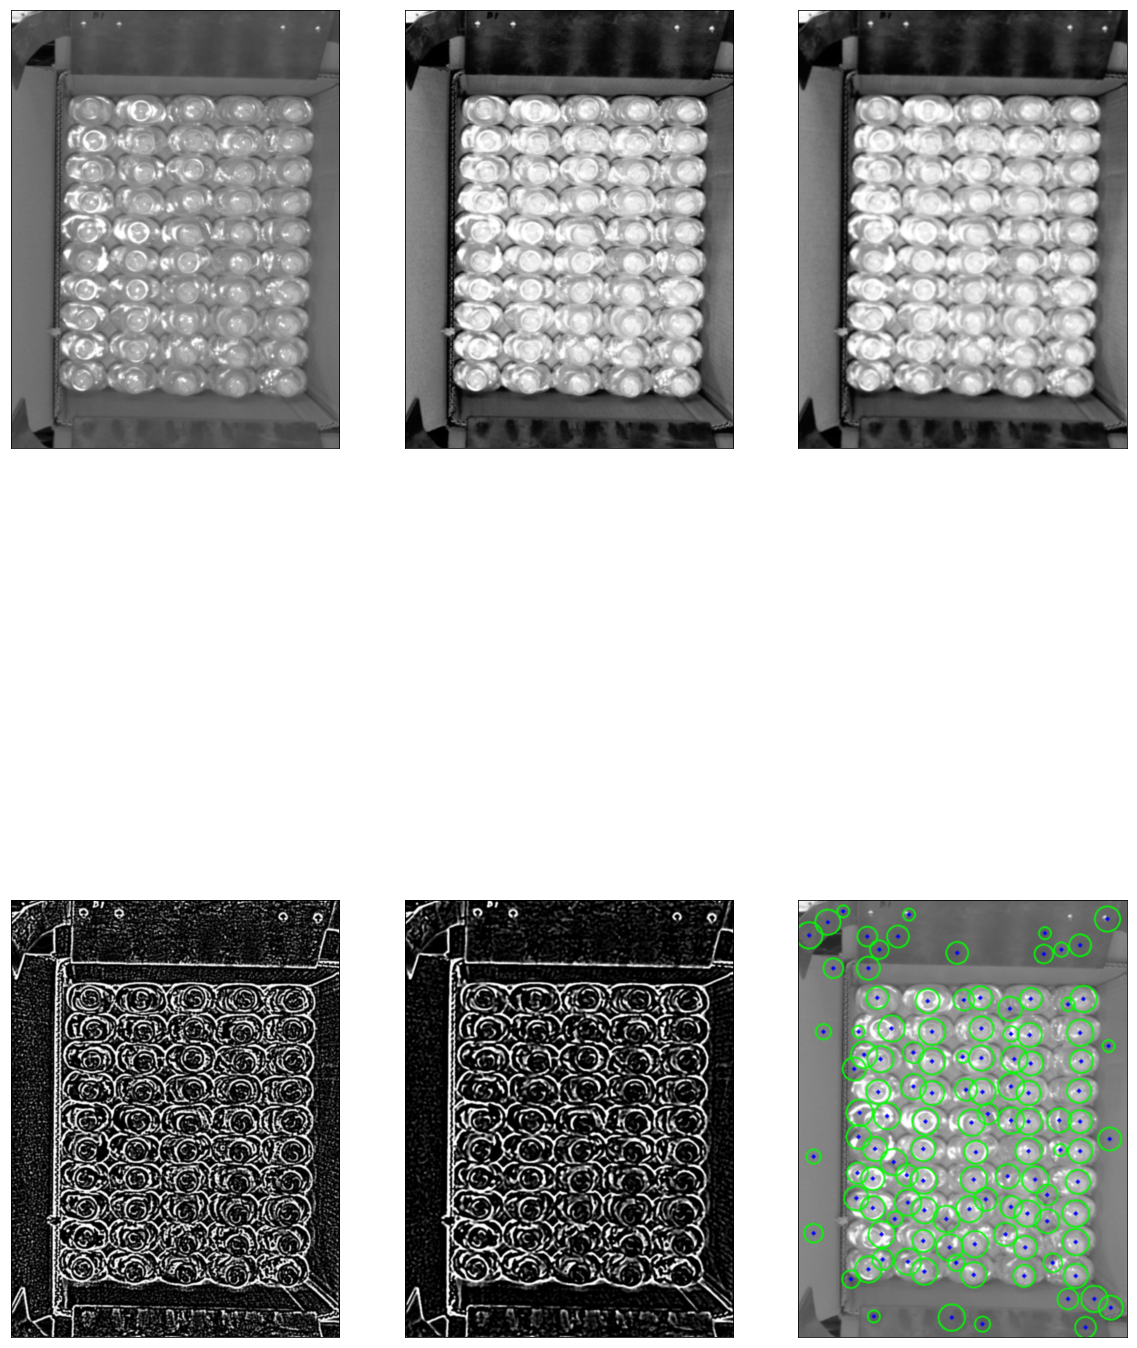

In [65]:
img = cv2.imread('../dataset/img/4 (257)_resize.jpg', 0)
equ_img = cv2.equalizeHist(img)
gau_img = cv2.GaussianBlur(equ_img, (5, 5), 0)
lap_img = cv2.Laplacian(gau_img, -1, ksize=5)
pre_img = cv2.medianBlur(lap_img, 5)
circles = cv2.HoughCircles(pre_img, cv2.HOUGH_GRADIENT, 1, 30, param1=100,
                            param2=20, minRadius=10, maxRadius=25)
print(circles)
circles = np.uint16(np.around(circles))
cir_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for i in circles[0, :]:
    # draw the outer circle
    cv2.circle(cir_img, (i[0],i[1]), i[2], (0,255,0), 2)
    # draw the center of the circle
    cv2.circle(cir_img, (i[0],i[1]), 2, (0,0,255), 3)

fig, ax = plt.subplots(2, 3, figsize=(20, 30), subplot_kw=dict(xticks=[],yticks=[]))
ax[0,0].imshow(img, cmap='gray', interpolation='bicubic')
ax[0,1].imshow(equ_img, cmap='gray', interpolation='bicubic')
ax[0,2].imshow(gau_img, cmap='gray', interpolation='bicubic')
ax[1,0].imshow(lap_img, cmap='gray', interpolation='bicubic')
ax[1,1].imshow(pre_img, cmap='gray', interpolation='bicubic')
ax[1,2].imshow(cir_img, interpolation='bicubic')
plt.show()